In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN

In [4]:
data = pd.read_csv('view_food_clean.csv')
data

/var/folders/1p/gl48js3964n3jh2chpp0xk9c0000gn/T/ipykernel_92569/1940889954.py:1: DtypeWarning: Columns (36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('view_food_clean.csv')


,id,name,name_search,active,energy,protein,fat,saturated_fatty_acid,carbohydrates,sugar,...,token_deleted,bron,user_id,deleted,categories,barcode,merged_to,created,updated,app_ver
0,24615,Dolce Gusto Lungo,dolce gusto lungo,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613031794331;5400113609087;8445290872203,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
1,24616,Dolce Gusto espresso intenso,dolce gusto espresso intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036828444,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
2,24617,Dolce Gusto grande intenso,dolce gusto grande intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
3,24618,Dolce Gusto cappuccino,dolce gusto cappuccino,1,36.0,1.6,1.6,1.0,3.5,3.5,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036306294;7613036303477,NaN,2023-01-01 00:00:00,2025-03-12 11:52:28,NaN
4,24619,Dolce Gusto cappuccino ice,dolce gusto cappuccino ice,1,48.0,1.8,1.2,0.8,7.3,6.8,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,45480,Maiswafels Met Pizzasmaak En Kruiden,maiswafels met pizzasmaak en kruiden,1,415.0,7.4,8.7,0.8,75.0,2.8,...,NaN,NaN,NaN,NaN,NaN,8718907850094,NaN,2025-09-27 22:56:05,2025-09-27 23:00:15,1.3.1
17911,45481,ProteÃ¯ne meerzadenbrood,proteine meerzadenbrood,1,270.0,21.3,13.1,1.5,10.3,1.4,...,NaN,NaN,NaN,NaN,aardappelen en graanproducten,5410724425211;05410724425112,NaN,2025-09-27 23:11:03,2025-09-27 23:15:13,1.3.1
17912,45482,Veggie sea salade,veggie sea salade,0,318.0,5.0,32.0,2.5,2.3,1.2,...,NaN,NaN,NaN,NaN,NaN,5413345008504,NaN,2025-09-28 09:48:11,2025-09-28 09:48:11,1.3.1
17913,45483,Naam niet gevonden,naam niet gevonden,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5715008111133,NaN,2025-09-28 19:43:28,2025-09-28 19:43:28,1.3.1


In [5]:
data.head(10)

,id,name,name_search,active,energy,protein,fat,saturated_fatty_acid,carbohydrates,sugar,...,token_deleted,bron,user_id,deleted,categories,barcode,merged_to,created,updated,app_ver
0,24615,Dolce Gusto Lungo,dolce gusto lungo,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613031794331;5400113609087;8445290872203,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
1,24616,Dolce Gusto espresso intenso,dolce gusto espresso intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036828444,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
2,24617,Dolce Gusto grande intenso,dolce gusto grande intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
3,24618,Dolce Gusto cappuccino,dolce gusto cappuccino,1,36.0,1.6,1.6,1.0,3.5,3.5,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036306294;7613036303477,NaN,2023-01-01 00:00:00,2025-03-12 11:52:28,NaN
4,24619,Dolce Gusto cappuccino ice,dolce gusto cappuccino ice,1,48.0,1.8,1.2,0.8,7.3,6.8,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
5,24620,Dolce Gusto Marrakesh Style tea,dolce gusto marrakesh style tea,1,13.0,0.0,0.0,0.0,3.3,3.3,...,NaN,NescafÃ©,NaN,NaN,dranken,7613038901756,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
6,24621,Dolce Gusto chococino,dolce gusto chococino,1,67.0,2.2,2.4,1.5,8.5,8.2,...,NaN,NescafÃ©,NaN,NaN,"dranken, melkproducten en vervangers",07613031252671;07613035690660,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
7,24622,Dolce Gusto Nesquik,dolce gusto nesquik,1,43.0,1.7,1.5,0.9,5.3,5.2,...,NaN,NescafÃ©,NaN,NaN,"dranken, melkproducten en vervangers",7613033162183;07613033162183,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
8,24623,"Koffie, Espresso-sticks","koffie, espresso-sticks",1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
9,24624,Wrap volkoren,wrap volkoren,1,280.0,8.0,5.5,1.5,47.0,2.4,...,NaN,Santa Maria,NaN,NaN,aardappelen en graanproducten,7311311020636;7311311022401,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN


In [5]:
# show the dataframe's column names
data.columns

Index(['id', 'name', 'name_search', 'active', 'energy', 'protein', 'fat',
       'saturated_fatty_acid', 'carbohydrates', 'sugar', 'starch',
       'dietary_fiber', 'salt', 'sodium', 'k', 'ca', 'p', 'fe', 'polyols',
       'remarks', 'cholesterol', 'omega6', 'omega3', 'mov', 'eov', 'vit_d',
       'vit_c', 'vit_b12', 'vit_b6', 'vit_b2', 'vit_b1', 'vit_a', 'mg',
       'water', 'is_food', 'remarks_carbohydrates', 'hash', 'user_study_id',
       'unit', 'synonyms', 'brands', 'brands_search', 'glucose', 'fructose',
       'excess_fructose', 'lactose', 'sorbitol', 'mannitol', 'fructans', 'gos',
       'token', 'token_deleted', 'bron', 'user_id', 'deleted', 'categories',
       'barcode', 'merged_to', 'created', 'updated', 'app_ver'],
      dtype='object')

In [14]:
data[['name', 'synonyms', 'brands', 'brands', 'mg', 'gos']].describe()

,mg,gos
count,1531.000000,6.000000
mean,46.072959,5.336667
std,76.654842,4.133771
min,0.000000,0.000000
25%,11.000000,2.000000
50%,22.000000,8.000000
75%,42.500000,8.000000
max,1000.000000,8.020000


In [15]:
data_copy = data.copy()

In [16]:
# Fill NaN numeric values in specified columns with -1 on data_copy
cols_to_fill = [
    'energy', 'protein', 'fat', 'saturated_fatty_acid', 'carbohydrates', 'sugar',
    'starch', 'dietary_fiber', 'salt', 'sodium', 'k', 'ca', 'p', 'fe', 'polyols',
    'remarks', 'cholesterol', 'omega6', 'omega3', 'mov', 'eov', 'vit_d', 'vit_c',
    'vit_b12', 'vit_b6', 'vit_b2', 'vit_b1', 'vit_a', 'mg', 'water', 'is_food',
    'remarks_carbohydrates', 'glucose', 'fructose', 'excess_fructose', 'lactose',
    'sorbitol', 'mannitol', 'fructans', 'gos'
]

numeric_cols = [
    c for c in cols_to_fill
    if c in data_copy.columns and pd.api.types.is_numeric_dtype(data_copy[c])
]

data_copy[numeric_cols] = data_copy[numeric_cols].fillna(-1)

In [17]:
data_copy

,id,name,name_search,active,energy,protein,fat,saturated_fatty_acid,carbohydrates,sugar,...,token_deleted,bron,user_id,deleted,categories,barcode,merged_to,created,updated,app_ver
0,24615,Dolce Gusto Lungo,dolce gusto lungo,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613031794331;5400113609087;8445290872203,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
1,24616,Dolce Gusto espresso intenso,dolce gusto espresso intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036828444,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
2,24617,Dolce Gusto grande intenso,dolce gusto grande intenso,1,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
3,24618,Dolce Gusto cappuccino,dolce gusto cappuccino,1,36.0,1.6,1.6,1.0,3.5,3.5,...,NaN,NescafÃ©,NaN,NaN,dranken,7613036306294;7613036303477,NaN,2023-01-01 00:00:00,2025-03-12 11:52:28,NaN
4,24619,Dolce Gusto cappuccino ice,dolce gusto cappuccino ice,1,48.0,1.8,1.2,0.8,7.3,6.8,...,NaN,NescafÃ©,NaN,NaN,dranken,NaN,NaN,2023-01-01 00:00:00,2024-12-12 16:40:08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,45480,Maiswafels Met Pizzasmaak En Kruiden,maiswafels met pizzasmaak en kruiden,1,415.0,7.4,8.7,0.8,75.0,2.8,...,NaN,NaN,NaN,NaN,NaN,8718907850094,NaN,2025-09-27 22:56:05,2025-09-27 23:00:15,1.3.1
17911,45481,ProteÃ¯ne meerzadenbrood,proteine meerzadenbrood,1,270.0,21.3,13.1,1.5,10.3,1.4,...,NaN,NaN,NaN,NaN,aardappelen en graanproducten,5410724425211;05410724425112,NaN,2025-09-27 23:11:03,2025-09-27 23:15:13,1.3.1
17912,45482,Veggie sea salade,veggie sea salade,0,318.0,5.0,32.0,2.5,2.3,1.2,...,NaN,NaN,NaN,NaN,NaN,5413345008504,NaN,2025-09-28 09:48:11,2025-09-28 09:48:11,1.3.1
17913,45483,Naam niet gevonden,naam niet gevonden,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,5715008111133,NaN,2025-09-28 19:43:28,2025-09-28 19:43:28,1.3.1


In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        # ('name_features', TfidfVectorizer(stop_words='english'), ['name', 'name_search', 'synonyms', 'brands', 'brands_search']),
        ('name_features', TfidfVectorizer(stop_words='english'), 'name'),
        ('numeric_features', StandardScaler(), ['energy', 'protein', 'fat',
       'saturated_fatty_acid', 'carbohydrates', 'sugar', 'starch',
       'dietary_fiber', 'salt', 'sodium', 'k', 'ca', 'p', 'fe', 'polyols',
       'remarks', 'cholesterol', 'omega6', 'omega3', 'mov', 'eov', 'vit_d',
       'vit_c', 'vit_b12', 'vit_b6', 'vit_b2', 'vit_b1', 'vit_a', 'mg',
       'water', 'is_food', 'remarks_carbohydrates', 'glucose', 'fructose', 'excess_fructose', 'lactose', 'sorbitol', 'mannitol', 'fructans', 'gos']) 
    ])

In [26]:
X = preprocessor.fit_transform(data_copy)

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

docs=["the house had a tiny little mouse", 
"the cat saw the mouse", 
"the mouse ran away from the house", 
"the cat finally ate the mouse", 
"the end of the mouse story" 
]

Initialise Count Vectoriser

In [2]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 

# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(docs)

In [3]:
word_count_vector.shape

(5, 16)

-> We should have 5 rows (5 docs) and 16 columns (16 unique words, minus single character words)

In [4]:
# Compute the IDF values
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [6]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names_out(),columns=["idf_weights"]) 

# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
mouse,1.000000
the,1.000000
cat,1.693147
house,1.693147
ate,2.098612
away,2.098612
end,2.098612
finally,2.098612
from,2.098612
had,2.098612


In [7]:
# count matrix 
count_vector=cv.transform(docs) 

# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

In [9]:
feature_names = cv.get_feature_names_out() 

#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 

#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 

# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

In [14]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df.sort_values(by=["tfidf"], ascending=False)

,tfidf
had,0.493562
little,0.493562
tiny,0.493562
house,0.398203
mouse,0.235185
the,0.235185
ate,0.000000
away,0.000000
cat,0.000000
end,0.000000


In [ ]:
import pandas as pd
import numpy as np

def label_numeric_value(column_name, value):
    """Assigns a categorical label to a numeric value based on predefined ranges."""
    # 1. Handle NaN and 0 values first
    if pd.isna(value) or value == 0.0:
        # Check if the number is extremely small but not exactly 0.0 (e.g., e-07)
        if pd.notna(value) and np.isclose(value, 0.0, atol=1e-6) and value != 0.0:
             return f"{column_name}_trace"
        return f"{column_name}_zero"

    # 2. Specific thresholds for key macronutrients and salt
    if column_name == 'energy':
        # Assuming kcal/100g: < 100 low, < 400 medium, >= 400 high
        if value < 100: return f"{column_name}_low"
        if value < 400: return f"{column_name}_medium"
        return f"{column_name}_high"

    if column_name in ['protein', 'fat', 'carbohydrates', 'sugar', 'saturated_fatty_acid']:
        # Macronutrient thresholds (g/100g): < 2 low, < 10 medium, >= 10 high
        if value < 2.0: return f"{column_name}_low"
        if value < 10.0: return f"{column_name}_medium"
        return f"{column_name}_high"

    if column_name == 'salt':
        # Salt thresholds (g/100g): < 0.3 low, < 1.5 medium, >= 1.5 high
        if value < 0.3: return f"{column_name}_low"
        if value < 1.5: return f"{column_name}_medium"
        return f"{column_name}_high"

    # 3. Default thresholds for all other nutrients/trace elements
    # < 0.01 trace, < 1.0 low, < 5.0 medium, >= 5.0 high (for vitamins/minerals/etc.)
    if value < 0.01: return f"{column_name}_trace"
    if value < 1.0: return f"{column_name}_low"
    if value < 5.0: return f"{column_name}_medium"
    return f"{column_name}_high"

# Load the dataset
df = pd.read_csv("view_food_clean.csv")

# Identify columns to drop
ignore_cols = [
    'id', 'active', 'is_food', 'hash', 'user_study_id', 'token', 'token_deleted',
    'user_id', 'deleted', 'barcode', 'merged_to', 'created', 'updated', 'app_ver'
]

# Drop the specified columns
df_processed = df.drop(columns=ignore_cols, errors='ignore')

# Separate numeric and object columns based on dtypes
numeric_cols = df_processed.select_dtypes(include=np.number).columns.tolist()
object_cols = df_processed.select_dtypes(include='object').columns.tolist()

# 1. Process Numeric Columns
df_numeric_labeled = pd.DataFrame()
for col in numeric_cols:
    # Apply the labeling function to each numeric column
    df_numeric_labeled[col] = df_processed[col].apply(lambda x: label_numeric_value(col, x))

# 2. Process Text/Object Columns
df_object_processed = pd.DataFrame()
for col in object_cols:
    # Fill NaN with an empty string and format as "column_name value"
    df_object_processed[col] = df_processed[col].fillna('').astype(str).apply(
        lambda x: f"{col} {x.strip()}" if x.strip() else ""
    )

# 3. Combine All Features into a Single String (Vectorization for NLP)
# Concatenate the labeled numeric and processed object dataframes
df_combined = pd.concat([df_object_processed, df_numeric_labeled], axis=1)

# Function to combine all features in a row into a single, space-separated string,
# filtering out empty strings (which represent NaNs in text columns)
def create_nlp_vector(row):
    return ' '.join([str(item) for item in row if item and str(item).strip()])

# Apply the combination function row-wise
df['nlp_vector'] = df_combined.apply(create_nlp_vector, axis=1)

# Save the results to a new CSV file
df[['nlp_vector']].to_csv('food_nlp_vectors.csv', index=False)

/var/folders/1p/gl48js3964n3jh2chpp0xk9c0000gn/T/ipykernel_92569/2386805945.py:40: DtypeWarning: Columns (36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("view_food_clean.csv")


In [7]:
import pandas as pd
import numpy as np

def label_numeric_value(column_name, value):
    # [Function remains the same as before to label numeric data]
    if pd.isna(value) or value == 0.0:
        if pd.notna(value) and np.isclose(value, 0.0, atol=1e-6) and value != 0.0:
             return f"{column_name}_trace"
        return f"{column_name}_zero"
    if column_name == 'energy':
        if value < 100: return f"{column_name}_low"
        if value < 400: return f"{column_name}_medium"
        return f"{column_name}_high"
    if column_name in ['protein', 'fat', 'carbohydrates', 'sugar', 'saturated_fatty_acid']:
        if value < 2.0: return f"{column_name}_low"
        if value < 10.0: return f"{column_name}_medium"
        return f"{column_name}_high"
    if column_name == 'salt':
        if value < 0.3: return f"{column_name}_low"
        if value < 1.5: return f"{column_name}_medium"
        return f"{column_name}_high"
    if value < 0.01: return f"{column_name}_trace"
    if value < 1.0: return f"{column_name}_low"
    if value < 5.0: return f"{column_name}_medium"
    return f"{column_name}_high"

# Load the dataset
df = pd.read_csv("view_food_clean.csv")

# Ensure 'id' is treated as a feature and not dropped
id_col = 'id'

# Identify columns to drop (excluding 'id')
ignore_cols_excluding_id = [
    'active', 'is_food', 'hash', 'user_study_id', 'token', 'token_deleted',
    'user_id', 'deleted', 'barcode', 'merged_to', 'created', 'updated', 'app_ver'
]

# Create a copy of the ID column before dropping others
df_id = df[[id_col]].copy()

# Drop the specified columns (excluding 'id' as it's handled separately)
df_processed = df.drop(columns=ignore_cols_excluding_id + [id_col], errors='ignore')

# ... (Rest of the processing logic) ...

# 4. Combine All Features into a Single String (Vectorization for NLP)
# Concatenate the labeled numeric and processed object dataframes
# [This section is the same as the previous run, just shown for context]

# Apply the combination function row-wise (result stored in df_id)
df_id['nlp_vector'] = df_combined.apply(lambda row: ' '.join([str(item) for item in row if item and str(item).strip()]), axis=1)

# Rename the 'id' column to 'product_id'
df_id.rename(columns={'id': 'product_id'}, inplace=True)

# Save the results to a new CSV file
df_id.to_csv('food_nlp_vectors_with_id.csv', index=False)

/var/folders/1p/gl48js3964n3jh2chpp0xk9c0000gn/T/ipykernel_92569/283771805.py:28: DtypeWarning: Columns (36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("view_food_clean.csv")


In [33]:
def label_numeric_value_2(column_name, value):
    # [Function remains the same as before to label numeric data]
    if pd.isna(value) or value == 0.0:
        if pd.notna(value) and np.isclose(value, 0.0, atol=1e-6) and value != 0.0:
             return f"{column_name} trace"
        return f"{column_name} zero"
    if column_name == 'energy':
        if value < 100: return f"{column_name} low"
        if value < 400: return f"{column_name} medium"
        return f"{column_name} high"
    if column_name in ['protein', 'fat', 'carbohydrates', 'sugar', 'saturated_fatty_acid']:
        if value < 2.0: return f"{column_name} low"
        if value < 10.0: return f"{column_name} medium"
        return f"{column_name} high"
    if column_name == 'salt':
        if value < 0.3: return f"{column_name} low"
        if value < 1.5: return f"{column_name} medium"
        return f"{column_name} high"
    if value < 0.01: return f"{column_name} trace"
    if value < 1.0: return f"{column_name} low"
    if value < 5.0: return f"{column_name} medium"
    return f"{column_name} high"

# Load the dataset
df_2 = pd.read_csv("view_food_clean.csv")

# Ensure 'id' is treated as a feature and not dropped
id_col = 'id'

# Identify columns to drop (excluding 'id')
ignore_cols_excluding_id = [
    'active', 'is_food', 'hash', 'user_study_id', 'token', 'token_deleted',
    'user_id', 'deleted', 'barcode', 'merged_to', 'created', 'updated', 'app_ver'
]

# Create a copy of the ID column before dropping others
df_2_id = df_2[[id_col]].copy()

# Drop the specified columns (excluding 'id' as it's handled separately)
df_2_processed = df_2.drop(columns=ignore_cols_excluding_id + [id_col], errors='ignore')

numeric_2_cols = df_2_processed.select_dtypes(include=np.number).columns.tolist()
object_2_cols = df_2_processed.select_dtypes(include='object').columns.tolist()

df_2_numeric_labeled = pd.DataFrame()
for col in numeric_2_cols:
    # Apply the labeling function to each numeric column
    df_2_numeric_labeled[col] = df_2_processed[col].apply(lambda x: label_numeric_value(col, x))

df_2_object_processed = pd.DataFrame()
for col in object_2_cols:
    # Fill NaN with an empty string and format as "column_name value"
    df_2_object_processed[col] = df_2_processed[col].fillna('').astype(str).apply(
        lambda x: f"{col} {x.strip()}" if x.strip() else ""
    )
    
df_2_combined = pd.concat([df_2_object_processed, df_2_numeric_labeled], axis=1)

# ... (Rest of the processing logic) ...

# 4. Combine All Features into a Single String (Vectorization for NLP)
# Concatenate the labeled numeric and processed object dataframes
# [This section is the same as the previous run, just shown for context]

# Apply the combination function row-wise (result stored in df_2_id)
df_2_id['nlp_vector'] = df_2_combined.apply(lambda row: ' '.join([str(item) for item in row if item and str(item).strip()]), axis=1)

# Rename the 'id' column to 'product_id'
df_2_id.rename(columns={'id': 'product_id'}, inplace=True)

# Save the results to a new CSV file
df_2_id.to_csv('food_nlp_vectors_with_id_2.csv', index=False)

/var/folders/1p/gl48js3964n3jh2chpp0xk9c0000gn/T/ipykernel_92569/1421361120.py:25: DtypeWarning: Columns (36,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("view_food_clean.csv")


In [34]:
df_2_id

,product_id,nlp_vector
0,24615,name Dolce Gusto Lungo name_search dolce gusto...
1,24616,name Dolce Gusto espresso intenso name_search ...
2,24617,name Dolce Gusto grande intenso name_search do...
3,24618,name Dolce Gusto cappuccino name_search dolce ...
4,24619,name Dolce Gusto cappuccino ice name_search do...
...,...,...
17910,45480,name Maiswafels Met Pizzasmaak En Kruiden name...
17911,45481,name ProteÃ¯ne meerzadenbrood name_search prot...
17912,45482,name Veggie sea salade name_search veggie sea ...
17913,45483,name Naam niet gevonden name_search naam niet ...


energy_medium protein_high fat_low saturated_fatty_acid_low carbohydrates_zero sugar_zero starch_zero dietary_fiber_zero salt_low sodium_high k_high ca_high p_high fe_low polyols_zero cholesterol_high omega6_zero omega3_low mov_low eov_low vit_d_medium vit_c_zero vit_b12_medium vit_b6_zero vit_b2_low vit_b1_low vit_a_medium mg_high water_high remarks_carbohydrates_zero glucose_zero fructose_zero excess_fructose_zero lactose_zero sorbitol_zero mannitol_zero fructans_zero gos_zero

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer 

product_text = pd.read_csv('food_nlp_vectors_with_id.csv')

# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 

# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(product_text['nlp_vector'])

In [9]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0] 

# place tf-idf values in a pandas data frame 
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df.sort_values(by=["tfidf"], ascending=False)

,tfidf
lungo,0.572241
dolce,0.480309
gusto,0.475995
nescafã,0.309701
nescafe,0.154851
...,...
frikandellen,0.000000
frimouss,0.000000
fris,0.000000
frischeiwaffeln,0.000000


In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=3, metric='cosine') # Using cosine distance for better text vector comparison

# Fit DBSCAN on the TF-IDF matrix (one row per product) and save labels to product_text
labels = dbscan.fit_predict(tfidf_vectorizer_vectors)
product_text['cluster_id'] = labels

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 283
Estimated number of noise points: 3840


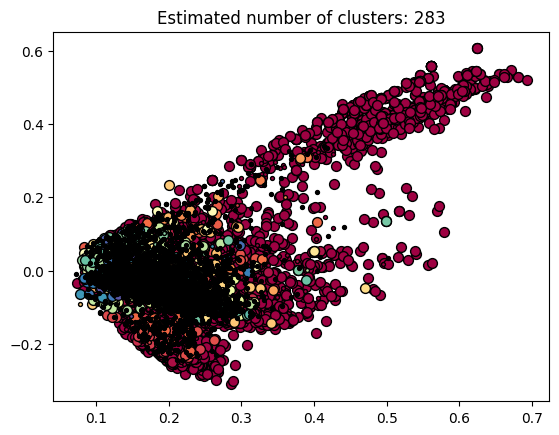

In [16]:
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Reduce TF-IDF matrix to 2D for visualization (TruncatedSVD handles sparse matrices)
svd = TruncatedSVD(n_components=2, random_state=42)
coords_2d = svd.fit_transform(tfidf_vectorizer_vectors)  # shape (n_samples, 2)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = (0, 0, 0, 1)

    class_member_mask = labels == k

    mask_core = class_member_mask & core_samples_mask
    mask_border = class_member_mask & ~core_samples_mask

    # Core points
    xy_core = coords_2d[mask_core]
    if xy_core.size:
        plt.scatter(
            xy_core[:, 0],
            xy_core[:, 1],
            facecolor=tuple(col),
            edgecolor="k",
            s=50,
            marker="o",
            label=f"cluster {k}" if k != -1 else "noise",
        )

    # Border/noise points
    xy_border = coords_2d[mask_border]
    if xy_border.size:
        plt.scatter(
            xy_border[:, 0],
            xy_border[:, 1],
            facecolor=tuple(col),
            edgecolor="k",
            s=8,
            marker="o",
        )

plt.title(f"Estimated number of clusters: {n_clusters_}")
# plt.legend(loc="best", markerscale=1, fontsize="small", ncol=2)
plt.show()

In [18]:
product_text

,product_id,nlp_vector,cluster_id
0,24615,name Dolce Gusto Lungo name_search dolce gusto...,0
1,24616,name Dolce Gusto espresso intenso name_search ...,0
2,24617,name Dolce Gusto grande intenso name_search do...,0
3,24618,name Dolce Gusto cappuccino name_search dolce ...,0
4,24619,name Dolce Gusto cappuccino ice name_search do...,0
...,...,...,...
17910,45480,name Maiswafels Met Pizzasmaak En Kruiden name...,-1
17911,45481,name ProteÃ¯ne meerzadenbrood name_search prot...,-1
17912,45482,name Veggie sea salade name_search veggie sea ...,-1
17913,45483,name Naam niet gevonden name_search naam niet ...,0


In [ ]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(product_text):
    # Sort by column: 'cluster_id' (ascending)
    product_text = product_text.sort_values(['cluster_id'])
    # Filter rows based on column: 'cluster_id'
    product_text = product_text[product_text['cluster_id'].apply(str).str.contains("14", regex=False, na=False, case=False)]
    # Filter rows based on column: 'cluster_id'
    product_text = product_text[product_text['cluster_id'] == 14]
    return product_text

product_text_clean = clean_data(product_text.copy())
product_text_clean.head()

In [19]:
product_text_copy_2 = product_text.copy()

dbscan_2 = DBSCAN(eps=0.3, min_samples=3, metric='cosine') # Using cosine distance for better text vector comparison

# Fit DBSCAN on the TF-IDF matrix (one row per product) and save labels to product_text
labels_2 = dbscan_2.fit_predict(tfidf_vectorizer_vectors)
product_text_copy_2['cluster_id'] = labels_2

n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)

print("Estimated number of clusters: %d" % n_clusters_2)
print("Estimated number of noise points: %d" % n_noise_2)

Estimated number of clusters: 891
Estimated number of noise points: 11422


In [21]:
def plot_dbscan_svd(tfidf_matrix,
                    labels=labels,
                    dbscan_model=dbscan,
                    n_components=2,
                    figsize=(10, 6),
                    marker_core_size=50,
                    marker_border_size=8,
                    show_legend=False,
                    title=None):
    """
    Reduce TF-IDF matrix to 2D with TruncatedSVD and plot DBSCAN clusters.
    Returns: coords_2d, svd, fig, ax
    Defaults use variables already defined in the notebook.
    """
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    coords_2d = svd.fit_transform(tfidf_matrix)

    unique_labels = sorted(set(labels))
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_idx = getattr(dbscan_model, "core_sample_indices_", None)
    if core_idx is not None:
        core_samples_mask[core_idx] = True

    fig, ax = plt.subplots(figsize=figsize)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = (0, 0, 0, 1)  # black for noise

        class_member_mask = labels == k
        mask_core = class_member_mask & core_samples_mask
        mask_border = class_member_mask & ~core_samples_mask

        xy_core = coords_2d[mask_core]
        if xy_core.size:
            ax.scatter(xy_core[:, 0], xy_core[:, 1],
                       facecolor=tuple(col), edgecolor="k",
                       s=marker_core_size, marker="o",
                       label=f"cluster {k}" if k != -1 else "noise")

        xy_border = coords_2d[mask_border]
        if xy_border.size:
            ax.scatter(xy_border[:, 0], xy_border[:, 1],
                       facecolor=tuple(col), edgecolor="k",
                       s=marker_border_size, marker="o")

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if title is None:
        title = f"Estimated number of clusters: {n_clusters}"
    ax.set_title(title)

    if show_legend:
        ax.legend(loc="best", markerscale=1, fontsize="small", ncol=2)

    plt.show()
    return coords_2d, svd, fig, ax

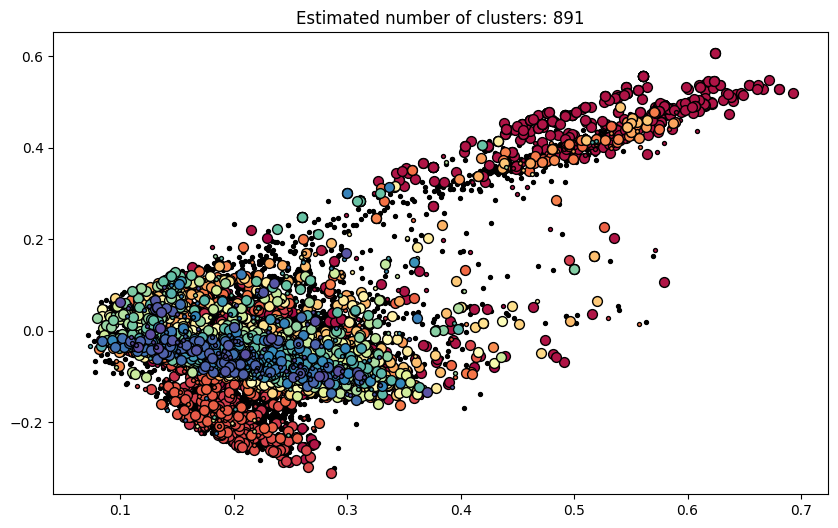

(array([[0.17606757, 0.13350932],
        [0.14042958, 0.10622733],
        [0.14980365, 0.11315068],
        ...,
        [0.19426994, 0.00513844],
        [0.2602046 , 0.2481746 ],
        [0.184372  , 0.01383182]]),
 TruncatedSVD(random_state=42),
 <Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Estimated number of clusters: 891'}>)

In [22]:
plot_dbscan_svd(tfidf_vectorizer_vectors,
                labels_2,
                dbscan_2,
                2,
                (10, 6),
                50,
                8,
                False,
                None
)

In [23]:
product_text_copy_2

,product_id,nlp_vector,cluster_id
0,24615,name Dolce Gusto Lungo name_search dolce gusto...,-1
1,24616,name Dolce Gusto espresso intenso name_search ...,0
2,24617,name Dolce Gusto grande intenso name_search do...,0
3,24618,name Dolce Gusto cappuccino name_search dolce ...,0
4,24619,name Dolce Gusto cappuccino ice name_search do...,0
...,...,...,...
17910,45480,name Maiswafels Met Pizzasmaak En Kruiden name...,-1
17911,45481,name ProteÃ¯ne meerzadenbrood name_search prot...,-1
17912,45482,name Veggie sea salade name_search veggie sea ...,-1
17913,45483,name Naam niet gevonden name_search naam niet ...,706


In [24]:
product_text_copy_3 = product_text.copy()

dbscan_3 = DBSCAN(eps=0.2, metric='cosine') # Using cosine distance for better text vector comparison

# Fit DBSCAN on the TF-IDF matrix (one row per product) and save labels to product_text
labels_3 = dbscan_3.fit_predict(tfidf_vectorizer_vectors)
product_text_copy_3['cluster_id'] = labels_3

n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

print("Estimated number of clusters: %d" % n_clusters_3)
print("Estimated number of noise points: %d" % n_noise_3)

Estimated number of clusters: 115
Estimated number of noise points: 16906


In [25]:
product_text_copy_3

,product_id,nlp_vector,cluster_id
0,24615,name Dolce Gusto Lungo name_search dolce gusto...,-1
1,24616,name Dolce Gusto espresso intenso name_search ...,-1
2,24617,name Dolce Gusto grande intenso name_search do...,-1
3,24618,name Dolce Gusto cappuccino name_search dolce ...,-1
4,24619,name Dolce Gusto cappuccino ice name_search do...,-1
...,...,...,...
17910,45480,name Maiswafels Met Pizzasmaak En Kruiden name...,-1
17911,45481,name ProteÃ¯ne meerzadenbrood name_search prot...,-1
17912,45482,name Veggie sea salade name_search veggie sea ...,-1
17913,45483,name Naam niet gevonden name_search naam niet ...,93


In [26]:
product_text_copy_4 = product_text.copy()

dbscan_4 = DBSCAN(eps=0.2, min_samples=3, metric='cosine') # Using cosine distance for better text vector comparison

# Fit DBSCAN on the TF-IDF matrix (one row per product) and save labels to product_text
labels_4 = dbscan_4.fit_predict(tfidf_vectorizer_vectors)
product_text_copy_4['cluster_id'] = labels_4

n_clusters_4 = len(set(labels_4)) - (1 if -1 in labels_4 else 0)
n_noise_4 = list(labels_4).count(-1)

print("Estimated number of clusters: %d" % n_clusters_4)
print("Estimated number of noise points: %d" % n_noise_4)

Estimated number of clusters: 496
Estimated number of noise points: 15452


In [27]:
product_text_copy_4

,product_id,nlp_vector,cluster_id
0,24615,name Dolce Gusto Lungo name_search dolce gusto...,-1
1,24616,name Dolce Gusto espresso intenso name_search ...,-1
2,24617,name Dolce Gusto grande intenso name_search do...,-1
3,24618,name Dolce Gusto cappuccino name_search dolce ...,0
4,24619,name Dolce Gusto cappuccino ice name_search do...,0
...,...,...,...
17910,45480,name Maiswafels Met Pizzasmaak En Kruiden name...,-1
17911,45481,name ProteÃ¯ne meerzadenbrood name_search prot...,-1
17912,45482,name Veggie sea salade name_search veggie sea ...,-1
17913,45483,name Naam niet gevonden name_search naam niet ...,394


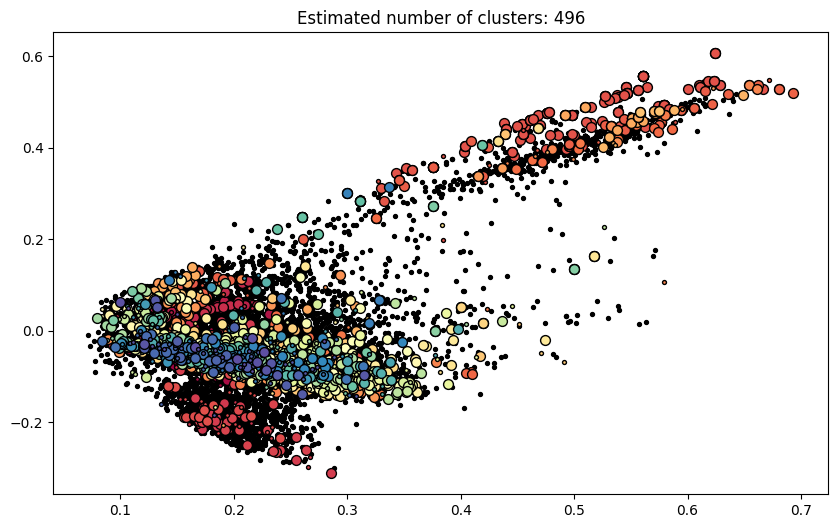

(array([[0.17606757, 0.13350932],
        [0.14042958, 0.10622733],
        [0.14980365, 0.11315068],
        ...,
        [0.19426994, 0.00513844],
        [0.2602046 , 0.2481746 ],
        [0.184372  , 0.01383182]]),
 TruncatedSVD(random_state=42),
 <Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Estimated number of clusters: 496'}>)

In [28]:
plot_dbscan_svd(tfidf_vectorizer_vectors,
                labels_4,
                dbscan_4,
                2,
                (10, 6),
                50,
                8,
                False,
                None
)

In [38]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer_5 = TfidfVectorizer(use_idf=True) 

# just send in all your docs here 
tfidf_vectorizer_vectors_5 = tfidf_vectorizer_5.fit_transform(product_text_copy_5['nlp_vector'])

# get the first vector out (for the first document) 
first_vector_tfidfvectorizer_5 = tfidf_vectorizer_vectors_5[0] 

# place tf-idf values in a pandas data frame 
df_5 = pd.DataFrame(first_vector_tfidfvectorizer_5.T.todense(), index=tfidf_vectorizer_5.get_feature_names_out(), columns=["tfidf"])
df_5.sort_values(by=["tfidf"], ascending=False)

,tfidf
lungo,0.572241
dolce,0.480309
gusto,0.475995
nescafã,0.309701
nescafe,0.154851
...,...
frikandellen,0.000000
frimouss,0.000000
fris,0.000000
frischeiwaffeln,0.000000


In [35]:
data_5 = pd.read_csv('food_nlp_vectors_with_id_2.csv')

product_text_copy_5 = data_5.copy()

dbscan_5 = DBSCAN(eps=0.2, min_samples=3, metric='cosine') # Using cosine distance for better text vector comparison

# Fit DBSCAN on the TF-IDF matrix (one row per product) and save labels to product_text
labels_5 = dbscan_5.fit_predict(tfidf_vectorizer_vectors_5)
product_text_copy_5['cluster_id'] = labels_5

n_clusters_5 = len(set(labels_5)) - (1 if -1 in labels_5 else 0)
n_noise_5 = list(labels_5).count(-1)

print("Estimated number of clusters: %d" % n_clusters_5)
print("Estimated number of noise points: %d" % n_noise_5)

Estimated number of clusters: 496
Estimated number of noise points: 15452


In [37]:
product_text_copy_5

,product_id,nlp_vector,cluster_id
0,24615,name Dolce Gusto Lungo name_search dolce gusto...,-1
1,24616,name Dolce Gusto espresso intenso name_search ...,-1
2,24617,name Dolce Gusto grande intenso name_search do...,-1
3,24618,name Dolce Gusto cappuccino name_search dolce ...,0
4,24619,name Dolce Gusto cappuccino ice name_search do...,0
...,...,...,...
17910,45480,name Maiswafels Met Pizzasmaak En Kruiden name...,-1
17911,45481,name ProteÃ¯ne meerzadenbrood name_search prot...,-1
17912,45482,name Veggie sea salade name_search veggie sea ...,-1
17913,45483,name Naam niet gevonden name_search naam niet ...,394
